## Introduction

For this activity, you will be analyzing a small business' historical marketing promotion data. Each row corresponds to an independent marketing promotion where their business uses TV, social media, radio, and influencer promotions to increase sales. They previously had you work on finding a single variable that predicts sales, and now they are hoping to expand this analysis to include other variables that can help them target their marketing efforts.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [25]:
data = pd.read_csv('marketing_sales_data.csv')

In [26]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


The features in the data are:
* TV promotion budget (in Low, Medium, and High categories)
* Social media promotion budget (in millions of dollars)
* Radio promotion budget (in millions of dollars)
* Sales (in millions of dollars)
* Influencer size (in Mega, Macro, Nano, and Micro categories)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

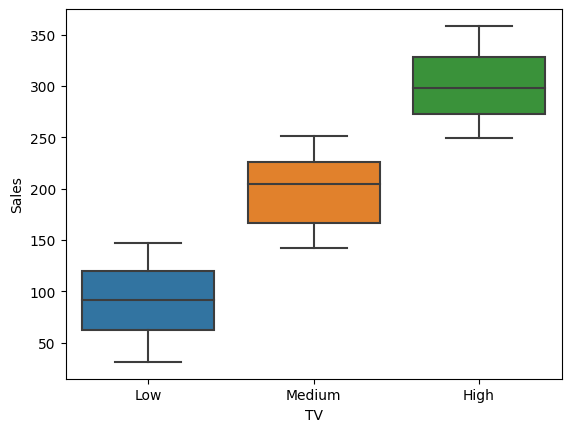

In [27]:
sns.boxplot(x = "TV", y = "Sales", data = data)

In [28]:
data.groupby('TV')['Sales'].mean()

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64

There is considerable variation in `Sales` across the `TV` groups. The significance of these differences can be tested with a one-way ANOVA.

The average `Sales` for `High` `TV` promotions is considerably higher than for `Medium` and `Low` `TV` promotions. `TV` may be a strong predictor of `Sales`.

<AxesSubplot:xlabel='Influencer', ylabel='Sales'>

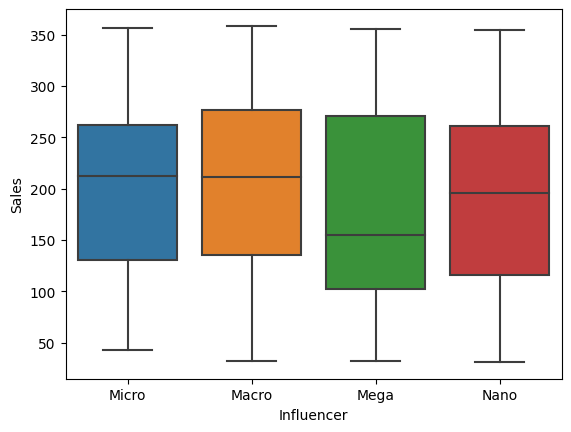

In [29]:
sns.boxplot(x = "Influencer", y = "Sales", data = data)

In [30]:
data.groupby('Influencer')['Sales'].mean()

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64

There is some variation in `Sales` across the `Influencer` groups, but it may not be significant.

The categories for `Influencer` have different average `Sales`, but the variation is not substantial. `Influencer` may be a weak predictor of `Sales`.

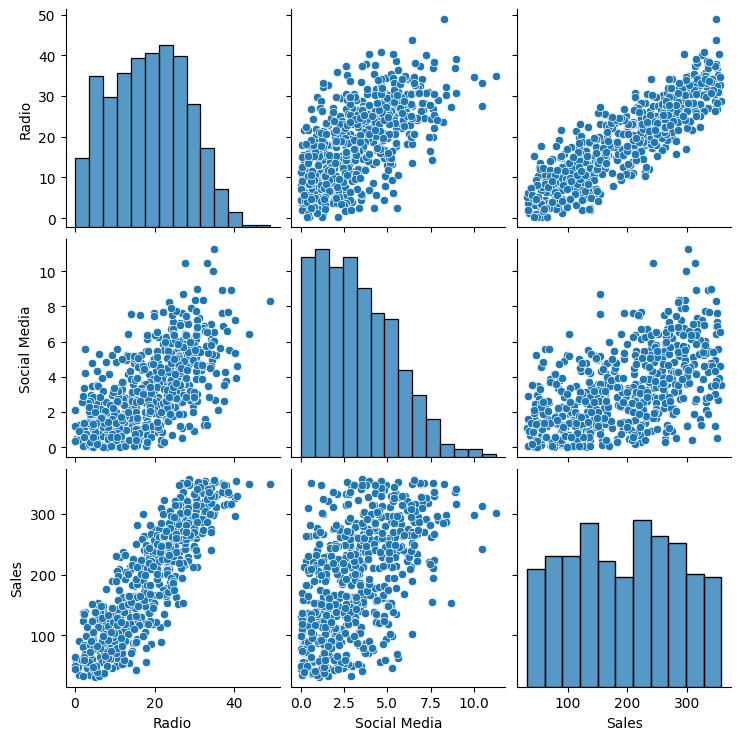

In [31]:
sns.pairplot(data)

`Radio` appear to have linear relationships with `Sales`. Given this, `Radio` may be useful as independent variables in a multiple linear regression model estimating `Sales`. 

In [32]:
data = data.dropna(axis=0)

In [33]:
data.isnull().sum(axis=0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

Based on the data exploration, I constructed a multiple linear regression model with `Sales` as dependent Y variable, `TV` and `Radio` as independent X variables.

In [34]:
ols_formula = 'Sales ~ C(TV) + Radio'

OLS = ols(formula = ols_formula, data = data)

model = OLS.fit()

model_results = model.summary()

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          1.61e-287
Time:                        21:37:58   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

### Model assumption: Linearity

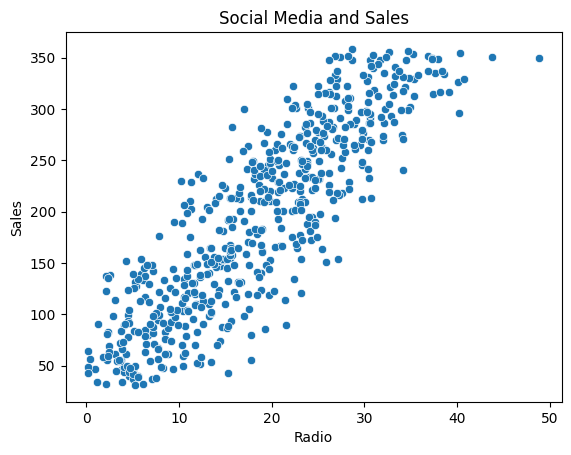

In [35]:
fig = sns.scatterplot(x = data['Radio'], y = data['Sales'])

fig.set_title("Social Media and Sales")

plt.show()


The linearity assumption holds for `Radio`, as there is a clear linear relationship in the scatterplot between `Radio` and `Sales`.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

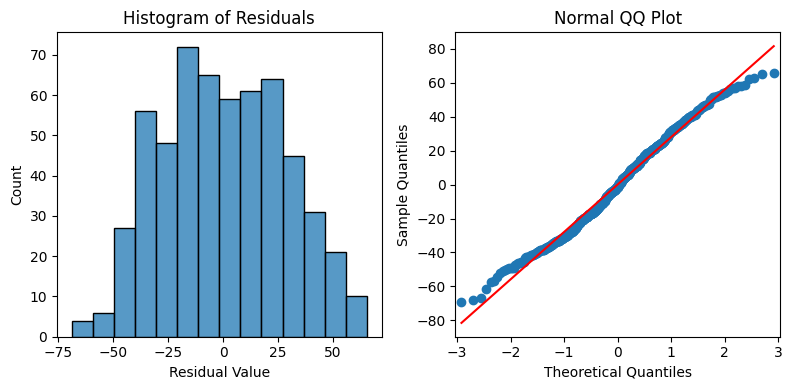

In [36]:
residuals = model.resid

# Create a histogram with the residuals. 
fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax=axes[0])

axes[0].set_xlabel("Residual Value")

axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])

axes[1].set_title("Normal QQ Plot")

plt.tight_layout()

plt.show()

The histogram of the residuals are approximately normally distributed, which supports that the normality assumption is met for this model. The residuals in the Q-Q plot form a straight line, further supporting that this assumption is met.

### Model assumption: Constant variance

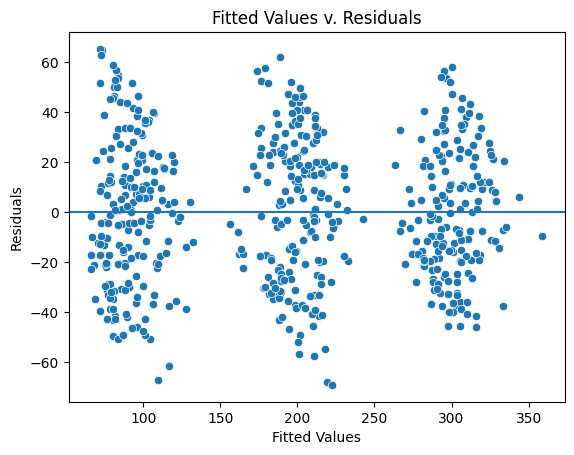

In [37]:
# Create a scatterplot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

fig.set_xlabel("Fitted Values")

fig.set_ylabel("Residuals")

fig.set_title("Fitted Values v. Residuals")

fig.axhline(0)

plt.show()

The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales.

However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

### Model assumption: No multicollinearity

The preceding model only has one continous independent variable, meaning there are no multicollinearity issues. 

### Evaluated the OLS regression results

In [38]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          1.61e-287
Time:                        21:37:58   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using `TV` and `Radio` as the independent variables results in a multiple linear regression model with $R^{2} = 0.904$. In other words, the model explains $90.4\%$ of the variation in `Sales`. This makes the model an excellent predictor of `Sales`. 

When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  217.6367$
* $\beta_{TVLow}= -152.0897$
* $\beta_{TVMedium} = -73.4835$
* $\beta_{Radio} =  2.8864$

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$

$\text{Sales} = 218.5261 - 154.2971*X_{TVLow} - 75.3120*X_{TVMedium}+ 2.9669 *X_{Radio}$

High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a high to medium TV promotional budget reduces sales by $\$73.4835$ million (95% CI $[-80.530,-66.437])$, and switching from a high to low TV promotional budget reduces sales by $\$152.0897$ million (95% CI $[-162.225,-141.954])$. The model also estimates that an increase of $\$1$ million in the radio promotional budget will yield a $\$2.8864$ million increase in sales (95% CI $[2.460,3.312]$).

### Perform a one-way ANOVA test

Run a one-way ANOVA test to determine whether there is a statistically significant difference in `Sales` among groups.

In [39]:
ols_formula = 'Sales ~ C(TV)'

OLS = ols(formula = ols_formula, data = data)

model = OLS.fit()

model_results = model.summary()

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          8.81e-256
Time:                        21:37:59   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

H_0: There is no difference in `Sales` based on the `TV` promotion budget.

H_1: There is a difference in `Sales` based on the `TV` promotion budget.

In [40]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


The F-test statistic is 1971.46 and the p-value is $8.81 * 10^{-256}$ (i.e., very small). Because the p-value is less than 0.05, so reject the null hypothesis that there is no difference in `Sales` based on the `TV` promotion budget. There is a statistically significant difference in `Sales` among `TV` groups.

### Perform an ANOVA post hoc test

In [42]:
#Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.
tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"])

tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True


The first row, which compares the `High` and `Low` `TV` groups, indicates that you can reject the null hypothesis that there is no significant difference between the `Sales` of these two groups. The test would be as:

$H_0: TV_high=TV_Low$

The high TV promotional budget and the low TV promotional budget are the same.

$H_1: TV_high \neq TV_Low$

The high TV promotional budget and the low TV promotional budget are not the same.

**Result:** We *cannot* reject the null hypothesis that the high TV promotional budget and the low TV promotional budget are the same.

Same apply to two other pairwise comparisons that compare `High` to `Medium` and `Low` to `Medium`.